## Data Analysis and Visualization with Pandas, Matplotlib, and Seaborn


In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Productions.csv')
data.head()

,Company,Country,Headquarters,Est.,Notes
0,Aleph Producciones,Argentina,Buenos Aires,1990,NaN
1,Argentina Sono Film,Argentina,Buenos Aires,1933,NaN
2,BD Cine,Argentina,Buenos Aires,1995,NaN
3,Guacamole Films,Argentina,Buenos Aires,2002,NaN
4,Patagonik Film Group,Argentina,Buenos Aires,1996,NaN


### Basic Data Features

In [3]:
# Dimension of the dataset
print("Dataset shape: ", data.shape, '\n')

# summary statistics
print(data.info(), '\n')
print(data.describe())

Dataset shape:  (457, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       457 non-null    object
 1   Country       457 non-null    object
 2   Headquarters  402 non-null    object
 3   Est.          456 non-null    object
 4   Notes         172 non-null    object
dtypes: object(5)
memory usage: 18.0+ KB
None 

         Company        Country         Headquarters  Est.            Notes
count        457            457                  402   456              172
unique       456             40                  124   111              159
top     T-Series  United States  Mumbai, Maharashtra  2008  Christian films
freq           2            160                   30    15                8


### Pre-processing data

In [4]:
# handling missing values
miss_vals = data.isnull().sum()
print("Missing values:\n",miss_vals, '\n')

data['Headquarters']= data['Headquarters'].fillna('Unknown')
data['Est.']= data['Est.'].fillna(0)
data['Notes']= data['Notes'].fillna('N/A')

# converting to appropriate datatypes
data['Country'] = data['Country'].astype('category')
data['Headquarters'] = data['Headquarters'].astype('category')
data['Est.'] = pd.to_numeric(data['Est.'], errors= 'coerce').fillna(0).astype('Int64')
data.info()

Missing values:
 Company           0
Country           0
Headquarters     55
Est.              1
Notes           285
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Company       457 non-null    object  
 1   Country       457 non-null    category
 2   Headquarters  457 non-null    category
 3   Est.          457 non-null    Int64   
 4   Notes         457 non-null    object  
dtypes: Int64(1), category(2), object(2)
memory usage: 18.6+ KB


In [5]:
data.isnull().sum()

Company         0
Country         0
Headquarters    0
Est.            0
Notes           0
dtype: int64

### Count of unique companies and countries 

In [6]:
print("Unique companies:", data['Company'].nunique())
print("Unique countries:", data['Country'].nunique())

Unique companies: 456
Unique countries: 40


## Visualizations

### Top 5 countries with highest number of film companies

Country
United States     160
India              61
China              44
United Kingdom     33
Russia             23
Name: count, dtype: int64


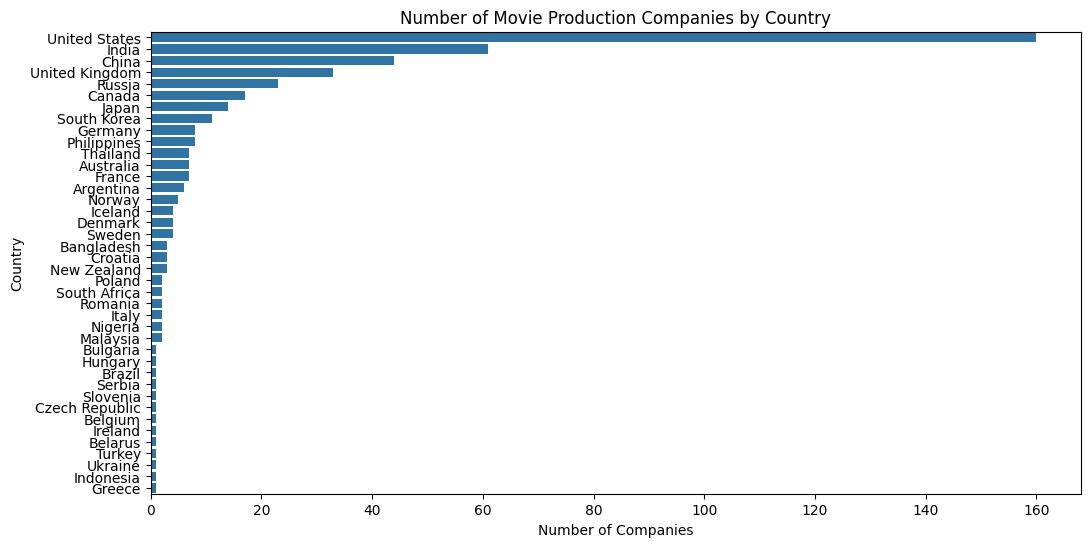

In [7]:
country_counts = data['Country'].value_counts().sort_values(ascending=False).head()
print(country_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Country', order=data['Country'].value_counts().index)
plt.title('Number of Movie Production Companies by Country')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.show()

### Trend in company establishment by years

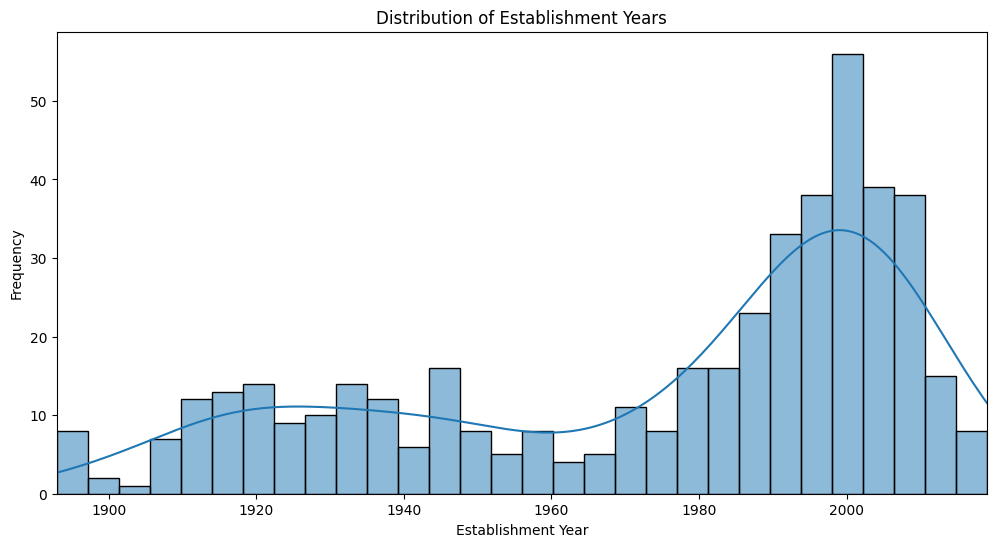

In [8]:
data = data.loc[data['Est.'] != 0]

plt.figure(figsize=(12, 6))
sns.histplot(data=data['Est.'], bins=30, kde=True)
plt.title('Distribution of Establishment Years')
plt.xlabel('Establishment Year')
plt.ylabel('Frequency')
plt.xlim(data['Est.'].min(), data['Est.'].max()) 
plt.show()


### Cities with most headquarters for production companies

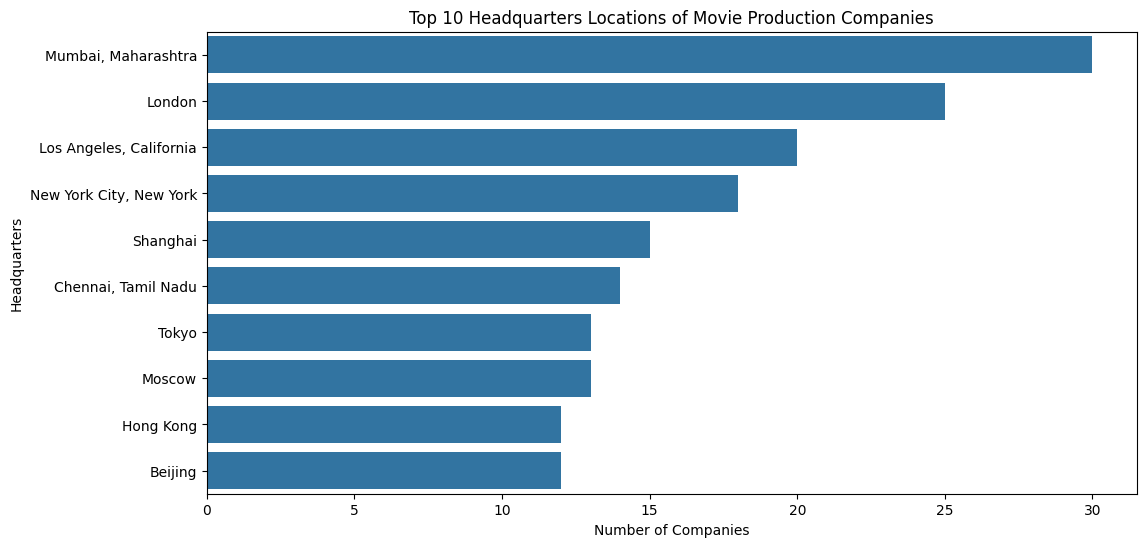

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, 
              y='Headquarters', 
              order=data['Headquarters'][data['Headquarters'] != 'Unknown'].value_counts().
              head(10).index)
plt.title('Top 10 Headquarters Locations of Movie Production Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Headquarters')
plt.show()


### Age of the companies 

Average age:  49.75

Top 10 oldest companies
                     Company  Age        Country
329     Edison's Black Maria  131  United States
92      Gaumont Film Company  129         France
373            Lubin Studios  128  United States
410  Selig Polyscope Company  128  United States
93                     Pathé  128         France
441        Vitagraph Studios  127  United States
187         Yoshizawa Shōten  127          Japan
99               Rialto Film  127        Germany
371     Limelight Department  126      Australia
186            Yokota Shōkai  123          Japan


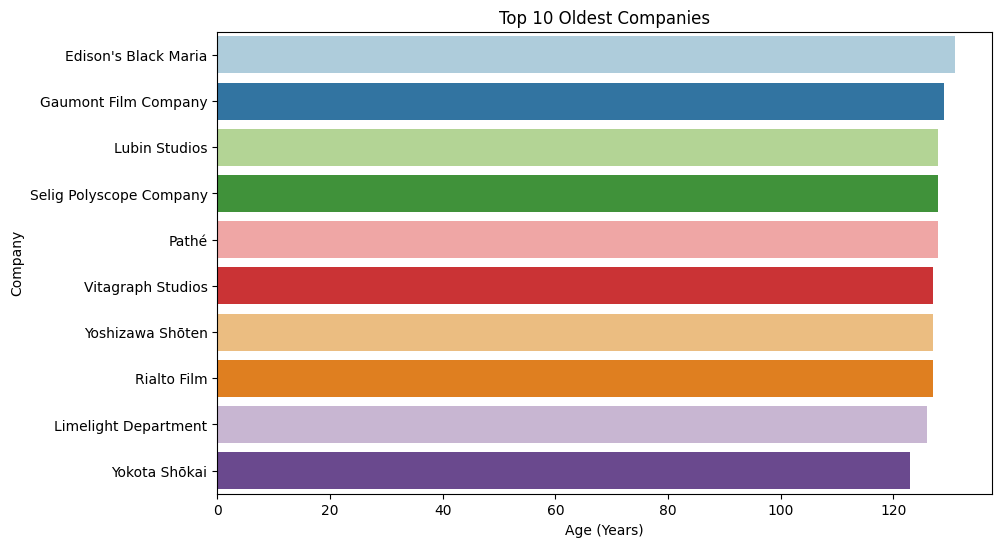

Top 10 newest companies
                   Company  Age        Country  Est.
306          Apple Studios    5  United States  2019
413    Sight & Sound Films    5  United States  2019
311  Called Higher Studios    5  United States  2019
84          HF Productions    7        Denmark  2017
248                Showbox    8    South Korea  2016
256                GDH 559    8       Thailand  2016
241  Coridel Entertainment    9    South Korea  2015
303        Amblin Partners    9  United States  2015
119      Clean Slate Films   10          India  2014
297              606 Films   10  United States  2014


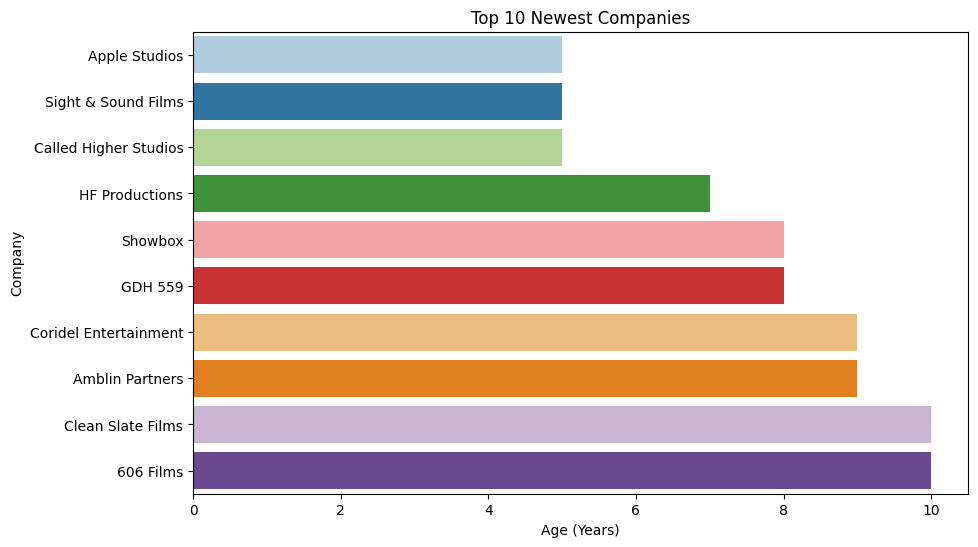

In [10]:
current_year = pd.to_datetime('now').year
data = data.loc[data['Est.'] != 0]
data['Age'] = current_year - data['Est.']

# Average age of the companies
print('Average age: ', '%.2f' % data['Age'].mean())


# Top 10 oldest companies
print('\nTop 10 oldest companies')

data_sorted = data.sort_values(ascending=False, by= 'Age')

print(data_sorted[['Company', 'Age', 'Country']].head(10))
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Company', hue='Company', 
            data=data_sorted.head(10), 
            palette='Paired', legend=False)
plt.title('Top 10 Oldest Companies')
plt.xlabel('Age (Years)')
plt.ylabel('Company')

plt.show()

# Top 10 newest companies
print('Top 10 newest companies')

data_sorted = data.sort_values(ascending=True, by= 'Age')

print(data_sorted[['Company', 'Age', 'Country', 'Est.']].head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Company', hue='Company', 
            data=data_sorted.head(10), 
            palette='Paired', legend=False)
plt.title('Top 10 Newest Companies')
plt.xlabel('Age (Years)')
plt.ylabel('Company')

plt.show()

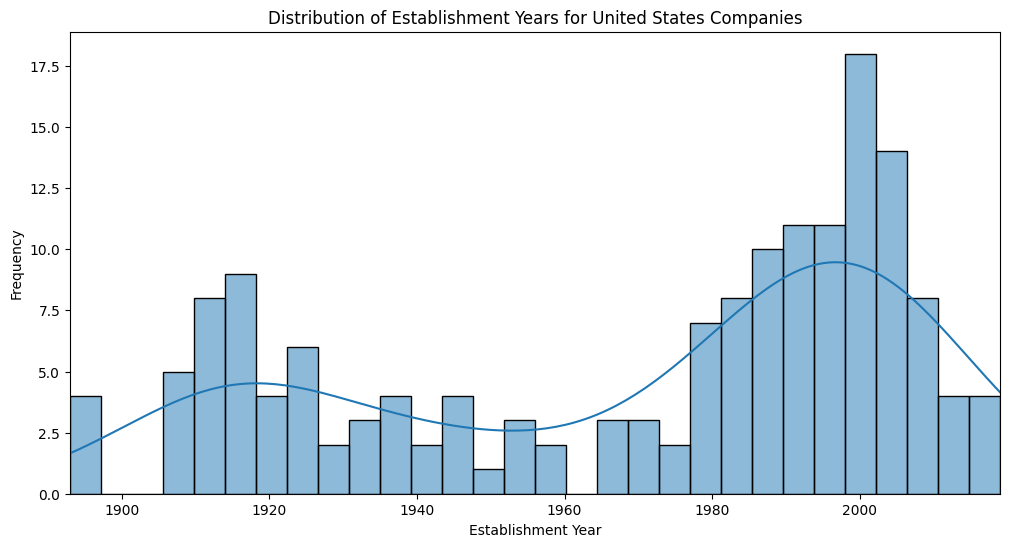

In [11]:
data = data.loc[data['Country'] == 'United States']

plt.figure(figsize=(12, 6))
sns.histplot(data=data['Est.'], bins=30, kde=True)
plt.title('Distribution of Establishment Years for United States Companies')
plt.xlabel('Establishment Year')
plt.ylabel('Frequency')
plt.xlim(data['Est.'].min(), data['Est.'].max()) 
plt.show()